# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

631

## Perform API Calls

In [3]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key 

# List of city data
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
        
        

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | luanda
Processing Record 2 of Set 1 | dikson
Processing Record 3 of Set 1 | hithadhoo
Processing Record 4 of Set 1 | codrington
Processing Record 5 of Set 1 | tiznit
Processing Record 6 of Set 1 | hilo
Processing Record 7 of Set 1 | berlevag
Processing Record 8 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 9 of Set 1 | kodiak
Processing Record 10 of Set 1 | kaeo
Processing Record 11 of Set 1 | avarua
Processing Record 12 of Set 1 | seoul
Processing Record 13 of Set 1 | mataura
Processing Record 14 of Set 1 | samusu
City not found. Skipping...
Processing Record 15 of Set 1 | abha
Processing Record 16 of Set 1 | yerbogachen
Processing Record 17 of Set 1 | punta arenas
Processing Record 18 of Set 1 | tawkar
City not found. Skipping...
Processing Record 19 of Set 1 | konstantinovskoye
Processing Record 20 of Set 1 | chuy
Processing Record 21 of Set 1 | paita
Processing Record 22 

Processing Record 33 of Set 4 | abiy adi
City not found. Skipping...
Processing Record 34 of Set 4 | muros
Processing Record 35 of Set 4 | asfi
City not found. Skipping...
Processing Record 36 of Set 4 | verkhnevilyuysk
Processing Record 37 of Set 4 | omboue
Processing Record 38 of Set 4 | sola
Processing Record 39 of Set 4 | kuche
City not found. Skipping...
Processing Record 40 of Set 4 | nara
Processing Record 41 of Set 4 | manjeshwar
Processing Record 42 of Set 4 | maues
Processing Record 43 of Set 4 | fort nelson
Processing Record 44 of Set 4 | mezen
Processing Record 45 of Set 4 | green river
Processing Record 46 of Set 4 | grand river south east
City not found. Skipping...
Processing Record 47 of Set 4 | acapulco
Processing Record 48 of Set 4 | touros
Processing Record 49 of Set 4 | vila franca do campo
Processing Record 0 of Set 5 | altamura
Processing Record 1 of Set 5 | bredasdorp
Processing Record 2 of Set 5 | belaya gora
Processing Record 3 of Set 5 | saint-augustin
Process

Processing Record 21 of Set 8 | lorengau
Processing Record 22 of Set 8 | amderma
City not found. Skipping...
Processing Record 23 of Set 8 | willowmore
Processing Record 24 of Set 8 | egvekinot
Processing Record 25 of Set 8 | viligili
City not found. Skipping...
Processing Record 26 of Set 8 | alihe
Processing Record 27 of Set 8 | iqaluit
Processing Record 28 of Set 8 | necochea
Processing Record 29 of Set 8 | majene
Processing Record 30 of Set 8 | cap malheureux
Processing Record 31 of Set 8 | noumea
Processing Record 32 of Set 8 | pacific grove
Processing Record 33 of Set 8 | urmary
Processing Record 34 of Set 8 | bathsheba
Processing Record 35 of Set 8 | moree
Processing Record 36 of Set 8 | peterhead
Processing Record 37 of Set 8 | faya
Processing Record 38 of Set 8 | gambiran
Processing Record 39 of Set 8 | tarko-sale
Processing Record 40 of Set 8 | umzimvubu
City not found. Skipping...
Processing Record 41 of Set 8 | kununurra
Processing Record 42 of Set 8 | north platte
Processi

Processing Record 4 of Set 12 | swan hill
Processing Record 5 of Set 12 | obzor
Processing Record 6 of Set 12 | lastoursville
Processing Record 7 of Set 12 | usak
Processing Record 8 of Set 12 | jujuy
City not found. Skipping...
Processing Record 9 of Set 12 | karoi
Processing Record 10 of Set 12 | phayakkhaphum phisai
Processing Record 11 of Set 12 | crab hill
City not found. Skipping...
Processing Record 12 of Set 12 | dakar
Processing Record 13 of Set 12 | puerto narino
Processing Record 14 of Set 12 | wanxian
Processing Record 15 of Set 12 | santa maria
Processing Record 16 of Set 12 | raga
City not found. Skipping...
Processing Record 17 of Set 12 | eydhafushi
Processing Record 18 of Set 12 | tucuman
Processing Record 19 of Set 12 | barcelos
Processing Record 20 of Set 12 | flin flon
Processing Record 21 of Set 12 | ushtobe
Processing Record 22 of Set 12 | oriximina
Processing Record 23 of Set 12 | saryg-sep
Processing Record 24 of Set 12 | svetlyy
City not found. Skipping...
Proc

In [4]:
# Convert array of JSONs into Pandas DataFrame
city_data_pd = pd.DataFrame(city_data)

# Extract relevant fields from the data frame
lats = city_data_pd["Lat"]
max_temps = city_data_pd["Max Temp"]
humidity = city_data_pd["Humidity"]
cloudiness = city_data_pd["Cloudiness"]
wind_speed = city_data_pd["Wind Speed"]

# Export the City_Data into a csv
city_data_pd.to_csv(output_data_file, index_label="City_ID")

# Show Record Count
city_data_pd.count()

City          564
Cloudiness    564
Country       564
Date          564
Humidity      564
Lat           564
Lng           564
Max Temp      564
Wind Speed    564
dtype: int64

In [5]:
# Display the City Data Frame
city_data_pd.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,luanda,3,AO,1563902863,83,-8.83,13.24,73.40,5.82
1,dikson,5,RU,1563902930,90,73.51,80.55,34.72,2.95
2,hithadhoo,99,MV,1563902930,76,-0.60,73.08,83.32,7.61
3,codrington,0,AU,1563902819,87,-28.95,153.24,55.99,9.17
4,tiznit,7,MA,1563902930,92,29.70,-9.73,69.10,11.77


## Latitude vs. Temperature Plot

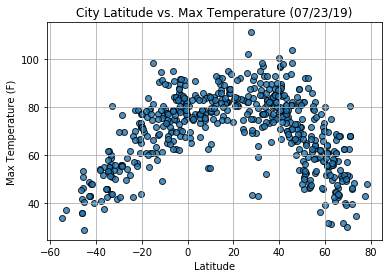

In [6]:
# Build scatter plot for latitude vs. temperature
plt.scatter(lats, 
            max_temps,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

## Latitude vs. Humidity Plot

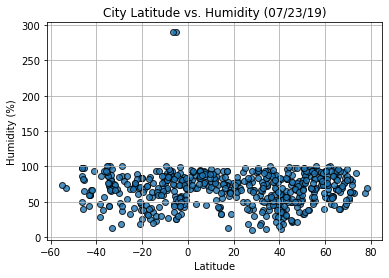

In [7]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(lats, 
            humidity,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

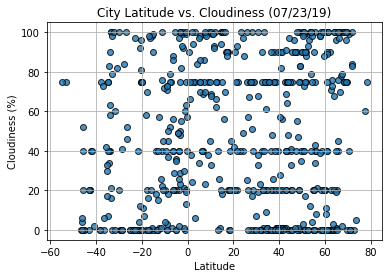

In [8]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lats, 
            cloudiness,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

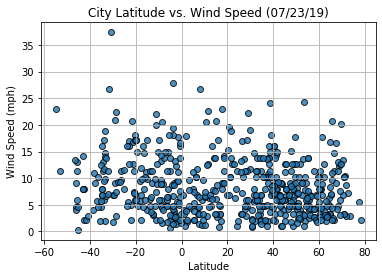

In [9]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(lats, 
            wind_speed,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

## Linear Regression

In [10]:
# Create a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    # Run regresson on southern hemisphere
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [11]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemi_df = city_data_pd.loc[(city_data_pd["Lat"] >= 0)]
southern_hemi_df = city_data_pd.loc[(city_data_pd["Lat"] < 0)]

###  Max Temp vs. Latitude Linear Regression

The r-squared is: -0.5853423583562567


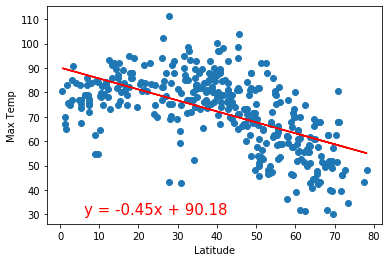

In [12]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp',(6,30))

The r-squared is: 0.8143387005204824


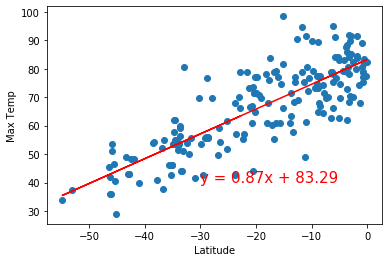

In [13]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp', (-30,40))

The high r value indicates a strong positive correlation between latitude and max temperature.

### Humidity (%) vs. Latitude Linear Regression

The r-squared is: -0.014429876255081235


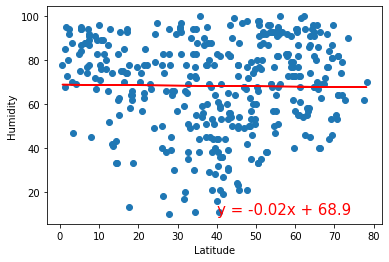

In [14]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity',(40,10))

The r-squared is: 0.005916369680637326


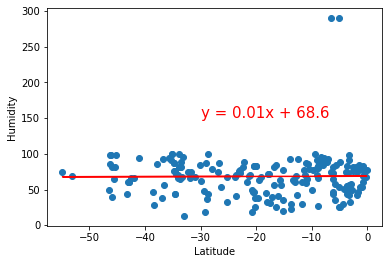

In [15]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity', (-30,150))

The low r values indicate a weak to no relationship between humidity and latitude.

### Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.1045538185572658


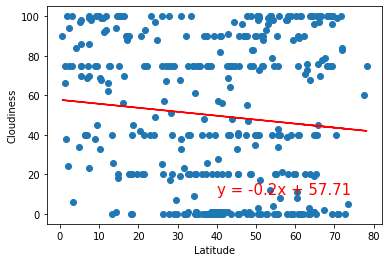

In [16]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (40,10))

The r-squared is: 0.13960563446090307


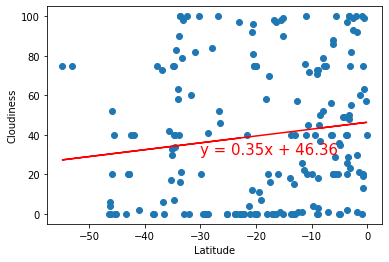

In [17]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (-30,30))

The low r values indicate a weak positive relationship between latitude and cloudiness.

### Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.0674021505790306


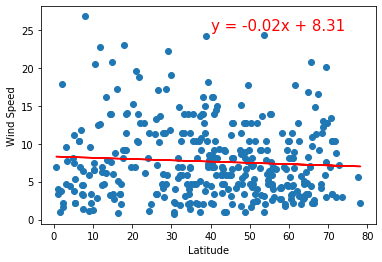

In [18]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (40,25))

The r-squared is: -0.08680688884832657


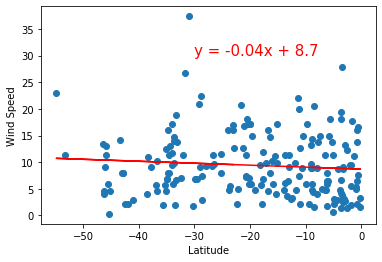

In [19]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (-30,30))

The low r values indicate that there is no real relationship between wind speed and latitude." The difference between the hemispheres doesn't seem to be significant enough to comment upon.